In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

import squarify

In [2]:
!apt_get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/nanum
!rm -rf ~/.cache/matplotlib > /dev/null


mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [3]:
df1_KT = pd.read_csv('방문객_KT/20230508104744_방문자수 히트맵.csv', encoding='cp949')
df2_KT = pd.read_csv('방문객_KT/20230508104744_광역별 방문자 수.csv', encoding='cp949')
df3_KT = pd.read_csv('방문객_KT/20230508104744_방문자 수 추이.csv', encoding='cp949')

df1_SKT = pd.read_csv('방문객_SKT/20230508105058_방문자수 히트맵.csv', encoding='cp949')
df2_SKT = pd.read_csv('방문객_SKT/20230508105058_광역별 방문자 수.csv', encoding='cp949')
df3_SKT = pd.read_csv('방문객_SKT/20230508105058_방문자 수 추이.csv', encoding='cp949')

In [107]:
df_time  = pd.read_excel('연도별통계(1975-2022).xlsx')
df_time

,월별 방한 외래관광객 (1975-2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Visitor Arrivals by Month, 1975-2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,연 도,계,성장률,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,Year,Total(명),Change(%),Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.
5,1975,632846,22.3,35494,37979,48733,50090,54741,56824,54439,60901,62188,68959,61335,41163
6,1976,834239,31.823382,53132,54190,67721,72636,75719,70727,69515,78207,77460,90774,74705,49453
7,1977,949666,13.836203,63052,66138,78442,88615,83151,78977,72650,85528,89828,99762,84919,58604
8,1978,1079396,13.660592,71812,74218,88620,93260,97457,93537,84141,95242,103099,115515,95860,66635
9,1979,1126100,4.326864,81236,81422,94674,103420,107847,102237,92006,106788,108925,106092,78319,63134


In [4]:
df1_KT.head()

,광역지자체,방문자 수
0,서울특별시,2.815155e+09
1,부산광역시,6.931449e+08
2,대구광역시,4.856364e+08
3,인천광역시,7.762415e+08
4,광주광역시,3.065771e+08


In [31]:
df1_SKT.head()

,광역지자체,방문자 수
0,서울특별시,936164502.0
1,부산광역시,279435540.0
2,대구광역시,176335480.0
3,인천광역시,345334237.0
4,광주광역시,107483150.0


In [30]:
df1_all = pd.concat([df1_KT, df1_SKT], axis=1)
df1_all.head()

,광역지자체,방문자 수,광역지자체,방문자 수
0,서울특별시,2.815155e+09,서울특별시,936164502.0
1,부산광역시,6.931449e+08,부산광역시,279435540.0
2,대구광역시,4.856364e+08,대구광역시,176335480.0
3,인천광역시,7.762415e+08,인천광역시,345334237.0
4,광주광역시,3.065771e+08,광주광역시,107483150.0


In [18]:
df1_all.iloc[:,1:2].head()

,방문자 수
0,2.815155e+09
1,6.931449e+08
2,4.856364e+08
3,7.762415e+08
4,3.065771e+08


In [19]:
df1_all.iloc[:,3:4].head()

,방문자 수
0,936164502.0
1,279435540.0
2,176335480.0
3,345334237.0
4,107483150.0


In [55]:
df1_all['모든방문자수'] = df1_all.iloc[:,1:2] + df1_all.iloc[:,3:4]
df1_all.head()

,광역지자체,방문자 수,광역지자체,방문자 수,모든방문자수
0,서울특별시,2.815155e+09,서울특별시,936164502.0,3.751319e+09
1,부산광역시,6.931449e+08,부산광역시,279435540.0,9.725804e+08
2,대구광역시,4.856364e+08,대구광역시,176335480.0,6.619719e+08
3,인천광역시,7.762415e+08,인천광역시,345334237.0,1.121576e+09
4,광주광역시,3.065771e+08,광주광역시,107483150.0,4.140602e+08


In [32]:
df2_KT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,춘천시,1.226069e+09,3.4,143282320.0,11.7
1,강원도,원주시,1.226069e+09,3.4,146515492.0,12.0
2,강원도,강릉시,1.226069e+09,3.4,161428480.0,13.2
3,강원도,동해시,1.226069e+09,3.4,53158468.0,4.3
4,강원도,태백시,1.226069e+09,3.4,24955417.0,2.0
...,...,...,...,...,...,...
245,충청북도,증평군,1.122346e+09,3.1,27296817.0,2.4
246,충청북도,진천군,1.122346e+09,3.1,58158992.0,5.2
247,충청북도,괴산군,1.122346e+09,3.1,45670706.0,4.1
248,충청북도,음성군,1.122346e+09,3.1,79607746.0,7.1


In [33]:
df2_SKT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,663061904.0,4.4,39699436.0,6.0
1,강원도,춘천시,663061904.0,4.4,67737016.0,10.2
2,강원도,원주시,663061904.0,4.4,64842802.0,9.8
3,강원도,강릉시,663061904.0,4.4,89910443.0,13.6
4,강원도,동해시,663061904.0,4.4,22539777.0,3.4
...,...,...,...,...,...,...
245,충청북도,단양군,493745299.0,3.3,23204634.0,4.7
246,충청북도,청주시 상당구,493745299.0,3.3,57694706.0,11.7
247,충청북도,청주시 서원구,493745299.0,3.3,49358424.0,10.0
248,충청북도,청주시 흥덕구,493745299.0,3.3,67961689.0,13.8


In [36]:
# merge on '기초지자체명' outer ---> add 기초지자체 방문자수
# 춘천 143282320.0,663061904.0
# 괴산 45670706.0 24247000  --> correct!
df2_all = df2_KT.merge(df2_SKT, how='outer', on='기초지자체명')
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y
0,강원도,춘천시,1.226069e+09,3.4,143282320.0,11.7,강원도,663061904.0,4.4,67737016.0,10.2
1,강원도,원주시,1.226069e+09,3.4,146515492.0,12.0,강원도,663061904.0,4.4,64842802.0,9.8
2,강원도,강릉시,1.226069e+09,3.4,161428480.0,13.2,강원도,663061904.0,4.4,89910443.0,13.6
3,강원도,동해시,1.226069e+09,3.4,53158468.0,4.3,강원도,663061904.0,4.4,22539777.0,3.4
4,강원도,태백시,1.226069e+09,3.4,24955417.0,2.0,강원도,663061904.0,4.4,10470467.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,1.122346e+09,3.1,27296817.0,2.4,충청북도,493745299.0,3.3,10611528.0,2.1
354,충청북도,진천군,1.122346e+09,3.1,58158992.0,5.2,충청북도,493745299.0,3.3,29039646.0,5.9
355,충청북도,괴산군,1.122346e+09,3.1,45670706.0,4.1,충청북도,493745299.0,3.3,24247000.0,4.9
356,충청북도,음성군,1.122346e+09,3.1,79607746.0,7.1,충청북도,493745299.0,3.3,34678984.0,7.0


In [44]:
df2_all['모든 기초지자체 방문자수'] = df2_all.iloc[:,4] + df2_all.iloc[:,9]
df2_all.head()

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든기초지자체방문자수,모든 기초지자체 방문자수
0,강원도,춘천시,1.226069e+09,3.4,143282320.0,11.7,강원도,663061904.0,4.4,67737016.0,10.2,211019336.0,211019336.0
1,강원도,원주시,1.226069e+09,3.4,146515492.0,12.0,강원도,663061904.0,4.4,64842802.0,9.8,211358294.0,211358294.0
2,강원도,강릉시,1.226069e+09,3.4,161428480.0,13.2,강원도,663061904.0,4.4,89910443.0,13.6,251338923.0,251338923.0
3,강원도,동해시,1.226069e+09,3.4,53158468.0,4.3,강원도,663061904.0,4.4,22539777.0,3.4,75698245.0,75698245.0
4,강원도,태백시,1.226069e+09,3.4,24955417.0,2.0,강원도,663061904.0,4.4,10470467.0,1.6,35425884.0,35425884.0


In [41]:
df2_all.iloc[:,4]

0      143282320.0
1      146515492.0
2      161428480.0
3       53158468.0
4       24955417.0
          ...     
353     27296817.0
354     58158992.0
355     45670706.0
356     79607746.0
357     39595467.0
Name: 기초지자체 방문자 수_x, Length: 358, dtype: float64

In [42]:
df2_all.iloc[:,9]

0      67737016.0
1      64842802.0
2      89910443.0
3      22539777.0
4      10470467.0
          ...    
353    10611528.0
354    29039646.0
355    24247000.0
356    34678984.0
357    23204634.0
Name: 기초지자체 방문자 수_y, Length: 358, dtype: float64

# df3은 방문자구분이 서로 달라서 데이터프레임을 합쳐서 분석할수 없음

In [52]:
df3_KT.head()

,기준년월,광역지자체,방문자 구분,방문자 수
0,2018,전국,현지인방문자(a),8.037606e+09
1,2018,전국,외지인방문자(b),2.734991e+09
2,2018,전국,외국인방문자(c),5.248704e+07
3,2018,전국,외부방문자(b+c),2.787478e+09
4,2018,전국,전체방문자(a+b+c),1.082508e+10


In [51]:
df3_SKT.head()

,기준년월,광역지자체,방문자 구분,방문자 수,전년도 방문자 수
0,2019,전국,외지인방문자(b),1.444248e+09,0.000000e+00
1,2019,전국,외국인방문자(c),8.573834e+07,0.000000e+00
2,2019,전국,외부방문자(b+c),1.529987e+09,0.000000e+00
3,2020,전국,외지인방문자(b),1.226631e+09,1.444248e+09
4,2020,전국,외국인방문자(c),1.255230e+07,8.573834e+07


# 분석&시각화

In [95]:
df1_all = df1_all.sort_values(by = '모든방문자수', ascending=True)
df1_all

,광역지자체,방문자 수,광역지자체,방문자 수,모든방문자수
7,세종특별자치시,1.246092e+08,세종특별자치시,6.228141e+07,1.868906e+08
6,울산광역시,2.287910e+08,울산광역시,9.710604e+07,3.258970e+08
4,광주광역시,3.065771e+08,광주광역시,1.074832e+08,4.140602e+08
16,제주특별자치도,2.883834e+08,제주특별자치도,1.776527e+08,4.660361e+08
5,대전광역시,3.806827e+08,대전광역시,1.381227e+08,5.188054e+08
2,대구광역시,4.856364e+08,대구광역시,1.763355e+08,6.619719e+08
12,전라북도,4.446968e+08,전라북도,2.188251e+08,6.635219e+08
10,충청북도,5.058470e+08,충청북도,2.544997e+08,7.603467e+08
13,전라남도,5.853563e+08,전라남도,3.192243e+08,9.045806e+08
1,부산광역시,6.931449e+08,부산광역시,2.794355e+08,9.725804e+08


In [96]:
df1_all['모든방문자수'][1]

972580410.0

In [97]:
df1_all['모든방문자수'][0]

3751319081.0

In [98]:
광역지자체 = df1_all.iloc[:,0].tolist()
광역지자체

['세종특별자치시',
 '울산광역시',
 '광주광역시',
 '제주특별자치도',
 '대전광역시',
 '대구광역시',
 '전라북도',
 '충청북도',
 '전라남도',
 '부산광역시',
 '경상남도',
 '인천광역시',
 '충청남도',
 '강원도',
 '경상북도',
 '서울특별시',
 '경기도']

In [99]:
모든방문자수 = df1_all.iloc[:,4].tolist()
모든방문자수

[186890563.0,
 325896992.0,
 414060249.0,
 466036051.0,
 518805411.0,
 661971872.0,
 663521867.0,
 760346680.0,
 904580612.0,
 972580410.0,
 1105913334.0,
 1121575753.0,
 1145820625.0,
 1152615600.0,
 1280207435.0,
 3751319081.0,
 4023570948.0]

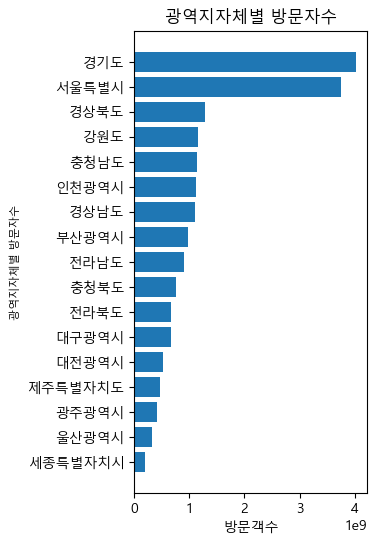

In [100]:
# Set the font name explicitly
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(3, 6))
plt.barh(광역지자체, 모든방문자수, height=0.8, align='center')
plt.title('광역지자체별 방문자수', fontsize=12)
plt.xlabel('방문객수', fontsize=10)
plt.ylabel('광역지자체별 방문자수', fontsize=8)
plt.show()

In [101]:
df2_all

,광역지자체명_x,기초지자체명,광역지자체 방문자 수_x,광역지자체 방문자 비율_x,기초지자체 방문자 수_x,기초지자체 방문자 비율_x,광역지자체명_y,광역지자체 방문자 수_y,광역지자체 방문자 비율_y,기초지자체 방문자 수_y,기초지자체 방문자 비율_y,모든기초지자체방문자수,모든 기초지자체 방문자수
0,강원도,춘천시,1.226069e+09,3.4,143282320.0,11.7,강원도,663061904.0,4.4,67737016.0,10.2,211019336.0,211019336.0
1,강원도,원주시,1.226069e+09,3.4,146515492.0,12.0,강원도,663061904.0,4.4,64842802.0,9.8,211358294.0,211358294.0
2,강원도,강릉시,1.226069e+09,3.4,161428480.0,13.2,강원도,663061904.0,4.4,89910443.0,13.6,251338923.0,251338923.0
3,강원도,동해시,1.226069e+09,3.4,53158468.0,4.3,강원도,663061904.0,4.4,22539777.0,3.4,75698245.0,75698245.0
4,강원도,태백시,1.226069e+09,3.4,24955417.0,2.0,강원도,663061904.0,4.4,10470467.0,1.6,35425884.0,35425884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,충청북도,증평군,1.122346e+09,3.1,27296817.0,2.4,충청북도,493745299.0,3.3,10611528.0,2.1,37908345.0,37908345.0
354,충청북도,진천군,1.122346e+09,3.1,58158992.0,5.2,충청북도,493745299.0,3.3,29039646.0,5.9,87198638.0,87198638.0
355,충청북도,괴산군,1.122346e+09,3.1,45670706.0,4.1,충청북도,493745299.0,3.3,24247000.0,4.9,69917706.0,69917706.0
356,충청북도,음성군,1.122346e+09,3.1,79607746.0,7.1,충청북도,493745299.0,3.3,34678984.0,7.0,114286730.0,114286730.0


In [109]:
df_time

,월별 방한 외래관광객 (1975-2022),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Visitor Arrivals by Month, 1975-2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,연 도,계,성장률,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,Year,Total(명),Change(%),Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.
5,1975,632846,22.3,35494,37979,48733,50090,54741,56824,54439,60901,62188,68959,61335,41163
6,1976,834239,31.823382,53132,54190,67721,72636,75719,70727,69515,78207,77460,90774,74705,49453
7,1977,949666,13.836203,63052,66138,78442,88615,83151,78977,72650,85528,89828,99762,84919,58604
8,1978,1079396,13.660592,71812,74218,88620,93260,97457,93537,84141,95242,103099,115515,95860,66635
9,1979,1126100,4.326864,81236,81422,94674,103420,107847,102237,92006,106788,108925,106092,78319,63134


In [114]:
years = df_time.iloc[5:,0].tolist()
years

[1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [115]:
visitors = df_time.iloc[5:,1].tolist()
visitors

[632846,
 834239,
 949666,
 1079396,
 1126100,
 976415,
 1093214,
 1145044,
 1194551,
 1297318,
 1426045,
 1659972,
 1874501,
 2340462,
 2728054,
 2958839,
 3196340,
 3231081,
 3331226,
 3580024,
 3753197,
 3683779,
 3908140,
 4250216,
 4659785,
 5321792,
 5147204,
 5347468,
 4752762,
 5818138,
 6022752,
 6155046,
 6448240,
 6890841,
 7817533,
 8797658,
 9794796,
 11140028,
 12175550,
 14201516,
 13231651,
 17241823,
 13335758,
 15346879,
 17502756,
 2519118,
 967003,
 3198017]

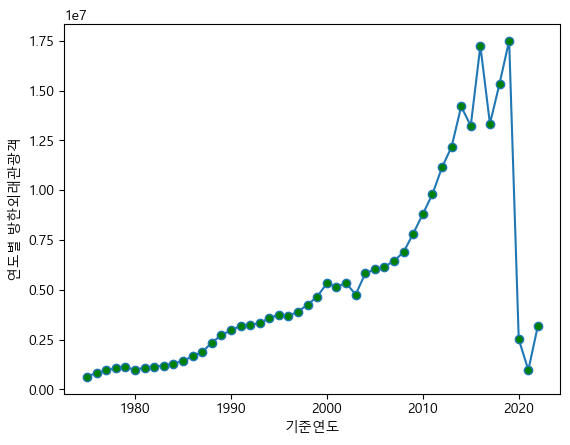

In [117]:
xpoints = years
ypoints = visitors

plt.xlabel("기준연도")
plt.ylabel("연도별 방한외래관광객")
plt.plot(xpoints ,ypoints, marker = 'o', markerfacecolor='green')
plt.show()